In [1]:
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftfreq

import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style

from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

#plt.ion()
## Plotting canvas properties.
params = {'legend.fontsize': 14,
          'axes.labelsize': 18,
          'axes.titlesize': 18,
          'xtick.labelsize' :14,
          'ytick.labelsize': 14,
          'grid.color': 'k',
          'grid.linestyle': ':',
          'grid.linewidth': 0.5,
          'mathtext.fontset' : 'stix',
          'mathtext.rm'      : 'DejaVu serif',
          'font.family'      : 'DejaVu serif',
          'font.serif'       : "Times New Roman", # or "Times"          
         }
matplotlib.rcParams.update(params)

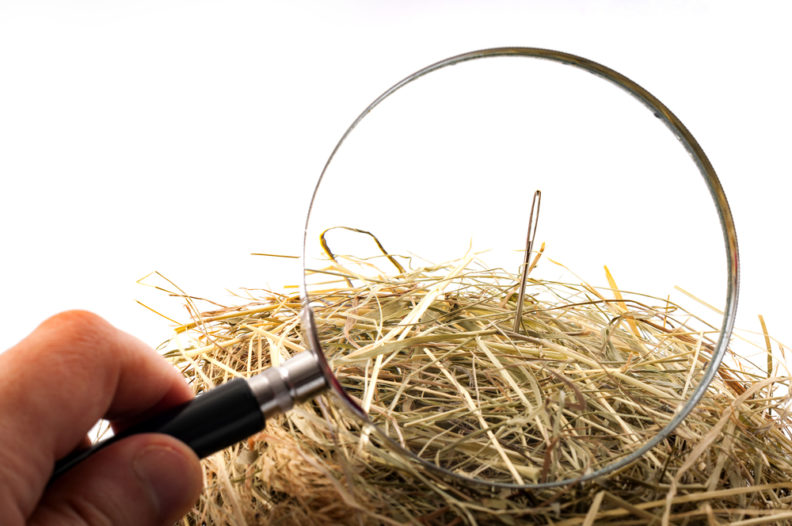

## Recap...

/tmp/ipykernel_513431/3084166036.py:33: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,0.5)


(0.1, 1000000)

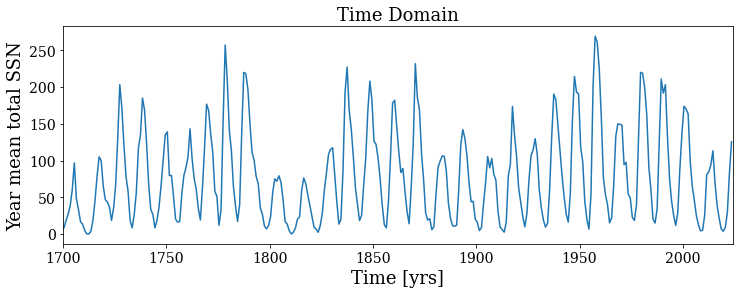

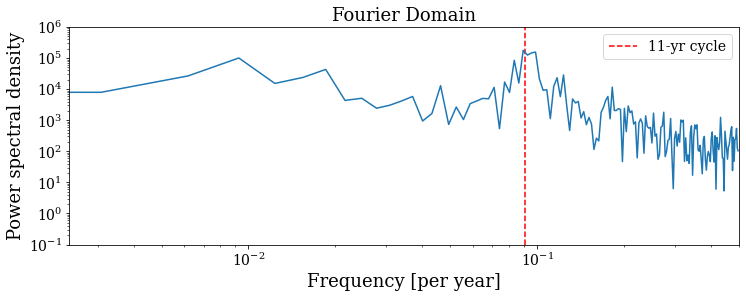

In [2]:
data = np.loadtxt('ssn.txt')
t = data[:,0]
ssn = data[:,1]
dt = t[1]-t[0] # year
sps = 1/dt
N = len(t)
Tobs=N

# plotting the signal
f1=plt.figure(figsize=[12,4])
plt.plot(t, ssn)
plt.xlabel('Time [yrs]')
plt.ylabel('Year mean total SSN')
plt.title('Time Domain')
plt.xlim(1700,2024)

# Lets compute the frequency array
df=1/Tobs  # frequency resolution
f=np.arange(0,N//2)*df
fy=2*fft(ssn)/N
psd = (np.abs(fy[:N//2]))**2
psd = psd/(2*df)


# plotting the corresponding power density spectrum
f3=plt.figure(figsize=[12,4])
plt.axvline(x=1/11, color='r', ls='--', lw=1.5, label='11-yr cycle')
plt.loglog(f,psd)
plt.xlabel('Frequency [per year]' )
plt.ylabel('Power spectral density')
plt.title('Fourier Domain')
plt.legend()
plt.xlim(0,0.5)
plt.ylim(0.1,1000000)

## Color of noise

For an autocorrelated time series, the spectral power contained in high frequencies $f$ decay gradually while obeying the relation: Power$\propto \dfrac{1}{f^{\alpha}}$. This $\alpha$ parameter defines the color of noise. It is zero for colorless noise i.e., non-correlated time series. See below,

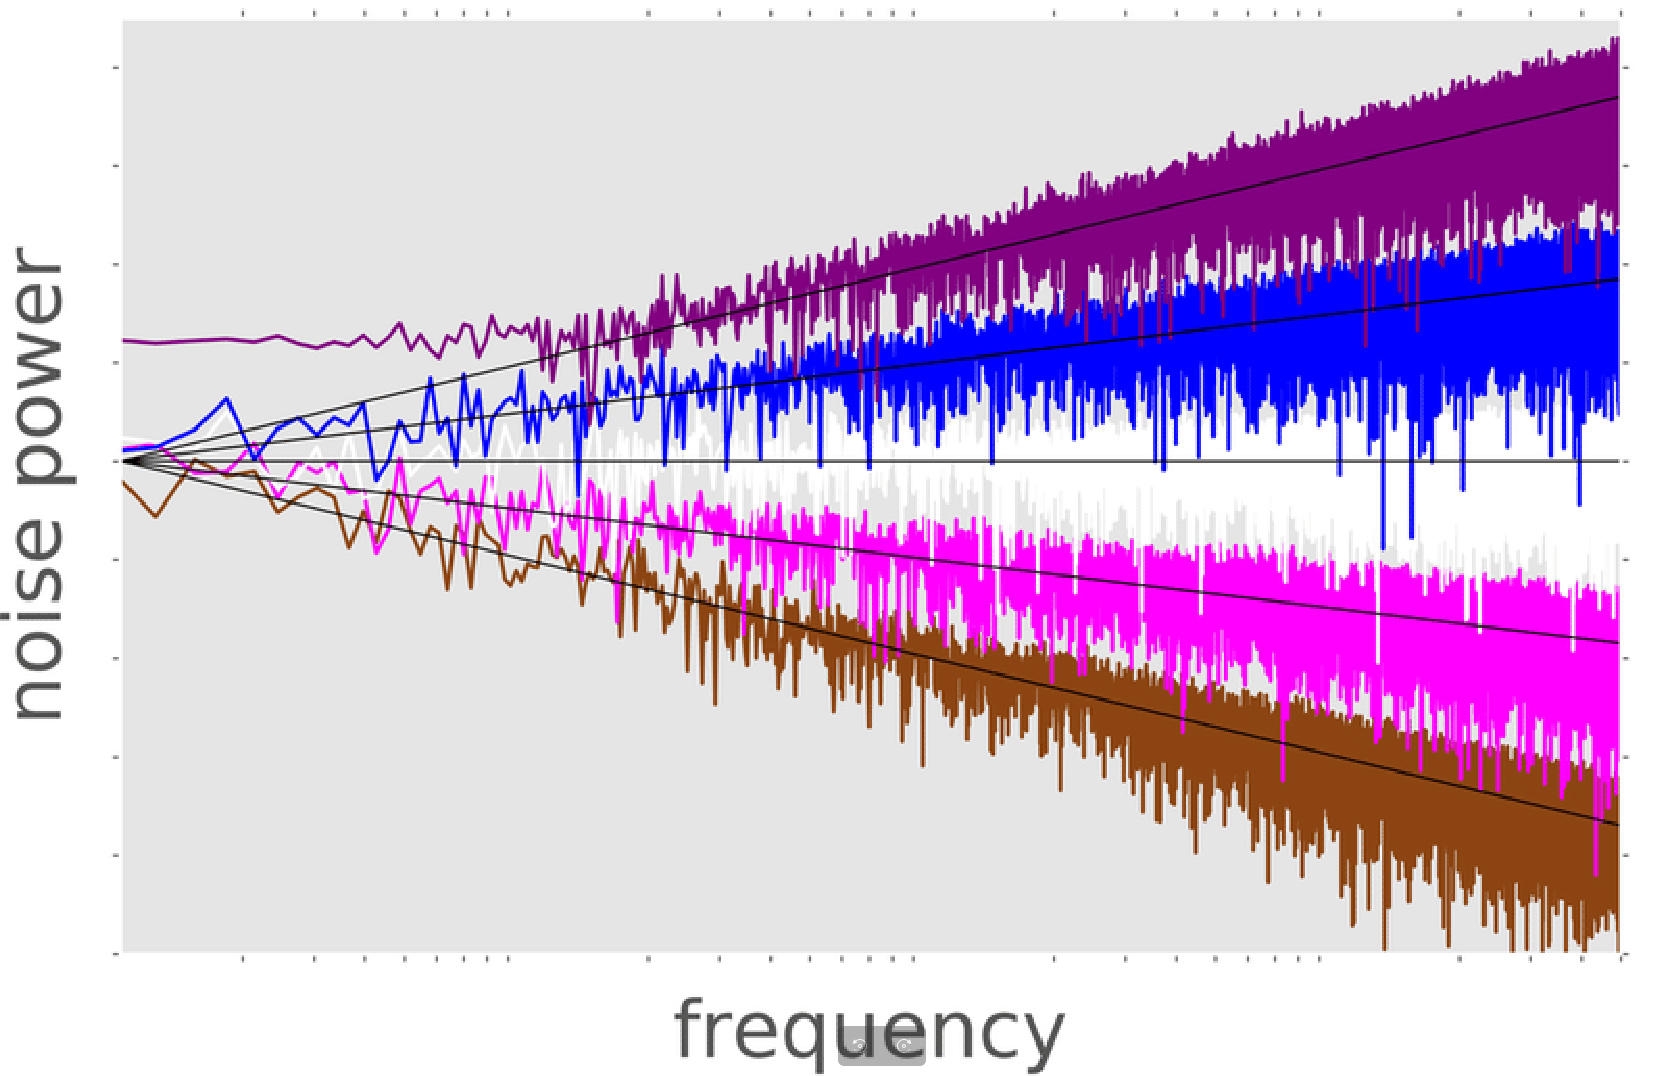

## Describe AR Model
- Mathematical Description of AR(1) Model
$$ R_t = \mu + \phi R_{t-1} + \epsilon_t $$
    - Since only one lagged value or right hand side, this is called, AR model of order 1 or, AR(1) model
    - AR paramter $\phi$, For stationary, $-1 < \phi < 1$
$$
$$

- High order AR Models
    - AR(1)
    $$ R_t = \mu + \phi_1 R_{t-1} + \epsilon_t $$
    - AR(2)
    $$ R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \epsilon_t $$
    - AR(3)
    $$ R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \phi_3 R_{t-3} + \epsilon_t $$
    - $\cdots$
    
    
### Let us simulate AR(1) Time Series
You will simulate and plot a few AR(1) time series, each with a different parameter, $\phi$, using the ```arima_process``` module in statsmodels. In this exercise, you will look at an AR(1) model with a large positive $\phi$, but feel free to play around with your own parameters.

There are a few conventions when using the arima_process module that require some explanation. First, these routines were made very generally to handle both AR and MA models. When inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with $\phi$=0.9, the array representing the AR parameters would be ```ar = np.array([1, -0.9])```

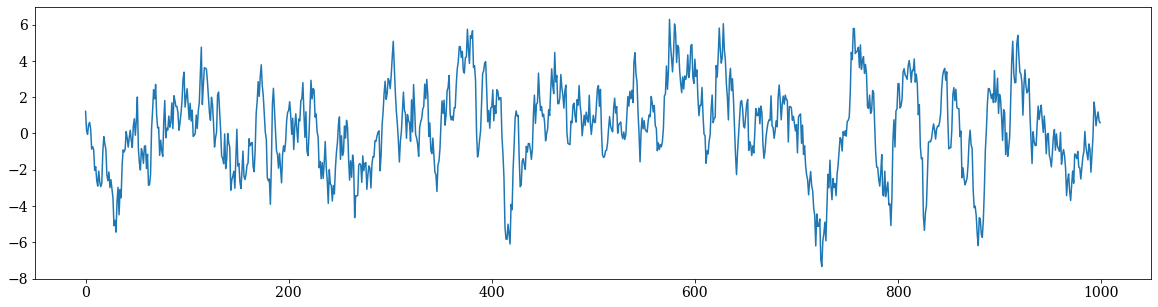

In [3]:
# Plot 1: AR parameter = +0.9

fig, ax = plt.subplots(figsize=(20,5))
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1);



### Exercise 1: Play with the ARIMA parameters to generate different set of time series and their power density spectra.

In [4]:
# your codes here























### We will now look at the sunspot number time series data.

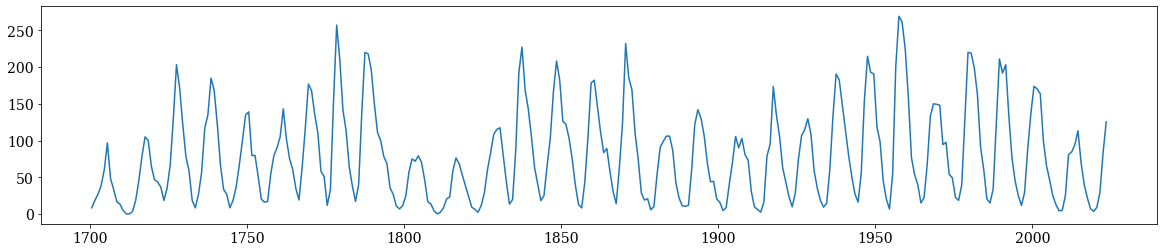

In [5]:
data = np.loadtxt('/home/chitradeep/Projects/TP_2024/Resources/Notebooks/ssn.txt')
t = data[:,0]
osn = data[:,1]
dt = t[1]-t[0]
Fs = 1.0 / dt
fig, ax = plt.subplots(figsize=(20,4))
plt.plot(t, osn)

## Standardization

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

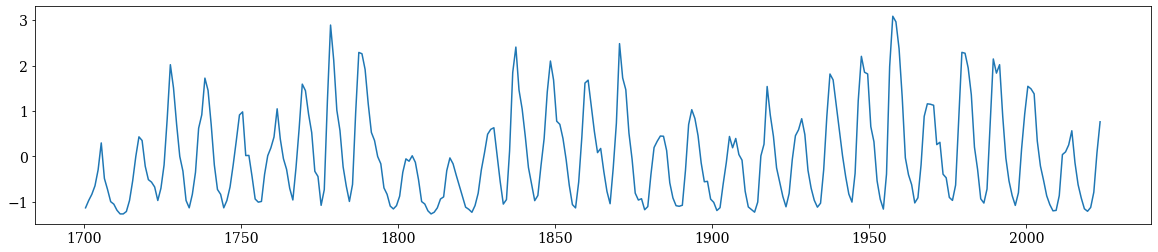

In [6]:
osn = (osn - np.mean(osn)) / np.std(osn)

fig, ax = plt.subplots(figsize=(20,4))
plt.plot(t, osn)

### Stationarity of a time series

A stationary time series is one whose statistical properties do not depend on the time at which the series is observed. Following is a statistical test for stationarity.

In [7]:
# KPSS test for stationarity

def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f"KPSS Statistic: {statistic}")
    print(f"p-value: {p_value}")
    print(f"num lags: {n_lags}")
    print("Critial Values:")
    for key, value in critical_values.items():
        print(f"   {key} : {value}")
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
    
kpss_test(osn)

KPSS Statistic: 0.2421654461288564
p-value: 0.1
num lags: 7
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/home/chitradeep/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## Choosing the Right Model: Identifying the Order of an AR Model

- The order of an AR(p) model will usually be unknown. There are primarily two techniques to determine order
    - Partial Autocorrelation Funciton
    - Information criteria
        
$$
$$

- **Partial Autocorrelation Function (PACF)**
$$ \begin{aligned} R_t &= \phi_{0,1} + \color{red}{\phi_{1,1}} R_{t-1} + \epsilon_{1t} \\
R_t &= \phi_{0,2} + \phi_{1,2} R_{t-1} + \color{red}{\phi_{2,2}} R_{t-2} + \epsilon_{2t} \\
R_t &= \phi_{0,3} + \phi_{1,3} R_{t-1} + \phi_{2,3} R_{t-2} + \color{red}{\phi_{3,3}} R_{t-3} + \epsilon_{3t} \\
R_t &= \phi_{0,4} + \phi_{1,4} R_{t-1} + \phi_{2,4} R_{t-2} + \phi_{3,4} R_{t-3} + \color{red}{\phi_{4,4}} R_{t-4} + \epsilon_{4t} \\
\end{aligned} $$
- **Information Criteria**
    - Information criteria: adjusts goodness-of-fit for number of parameters
    - Two popular adjusted goodness-of-fit measures
        - AIC ([Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion))
        - BIC ([Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion))

#### Partial Auto Correlation Function
One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

/home/chitradeep/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/chitradeep/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


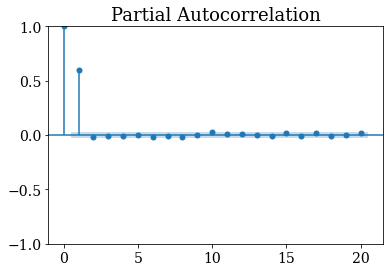

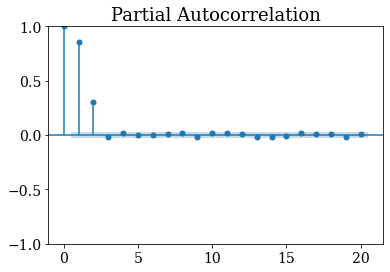

In [8]:
# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20);

# simulated AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20);

#### Information Criteria:  

Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the AR(2) simulated data from the last exercise, saved as simulated_data_2, and compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.

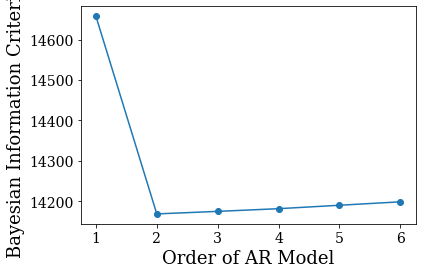

In [9]:
# Fit the data to an AR(p) for p=0,...,6, and save the BIC
BIC = np.zeros(7)

for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p, 0, 0))
    res = mod.fit()
    # Save BIC for AR(p)
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.plot(range(1, 7), BIC[1:7], marker='o');
plt.xlabel('Order of AR Model');
plt.ylabel('Bayesian Information Criterion');

### Exercise 2: Determine the lag parameter $p$ for SSN time series.

In [10]:
# your code here













### Despite being an AR(2) process, now we will model the noise in the SSN time series as an AR(1) process. Let us determine the AR(1) parameter using Allen and Smith modle for the given sunspot number time series

In [11]:
def ar1(x):    
    '''
    AR1 - Allen and Smith AR(1) model estimation.
     Syntax: [g,a,mu2]=ar1(x);

         Input:  x - time series (univariate).

         Output: g - estimate of the lag-one autocorrelation.
                 a - estimate of the noise variance.[unbiased_var(x)~=a^2/(1-g^2)]
                 mu2 - estimated square on the mean.
    '''
    x = np.array(x).flatten()
    N = len(x)
    m = np.mean(x)
    x = x - m

    # Lag zero and one covariance estimates
    c0 = np.dot(x, x) / N
    c1 = np.dot(x[:-1], x[1:]) / (N - 1)

    B=-c1*N-c0*N**2-2*c0+2*c1-c1*N**2+c0*N
    A=c0*N**2
    C=N*(c0+c1*N-c1)
    D=B**2-4*A*C
    if D>0:
        g=(-B-np.sqrt(D))/(2*A)
    else:
        g=nan; 

    mu2 = -1 / N + (2 / N ** 2) * ((N - g ** N) / (1 - g) - g * (1 - g ** (N - 1)) / (1 - g))
    c0t = c0 / (1 - mu2)
    a = np.sqrt((1 - g ** 2) * c0t)

    return g, a, mu2


print(f"g - estimate of the lag-one autocorrelation: {ar1(osn)[0]}")
print(f"a - estimate of the noise variance: {ar1(osn)[1]}")
print(f"mu2 - estimated square on the mean: {ar1(osn)[2]}")

g - estimate of the lag-one autocorrelation: 0.8235739215205313
a - estimate of the noise variance: 0.576452370264936
mu2 - estimated square on the mean: 0.0318128924714778


### Alternative method: Yule-Walker method (for any $p$)

In [12]:
#=======================
N_order = 1
#========================
phi, sigma = sm.regression.yule_walker(ssn, order=N_order)

print(f"phi - estimate of the lag-p autocorrelation: {phi}")
print(f"a - estimate of the noise standard deviation: {sigma}")

phi - estimate of the lag-p autocorrelation: [0.81777688]
a - estimate of the noise standard deviation: 35.58105803511857


### Synthesizing an ensemble of realizations based on the same noise model.

In [13]:
def ar1noise(x, c):
    
    '''
    Inputs: 
            n - desired length of time series
            c - number of time series to generate
            g - lag-1 autocorrelation
            a - noise innovation variance parameter

    Output: X - n by c matrix of red noise series.
    '''
    n = len(x)

# ======================================================== 
    g, a, mu2 = ar1(x)
# ======================================================== 
    
    # Set random seed for reproducibility
    np.random.seed(42)

    # Generate initial white noise
    X = np.zeros((n, c))
    X[0, :] = np.sqrt(a ** 2 / (1 - g ** 2)) * np.random.randn(1, c)
    z = a * np.random.randn(n, c)

    
# ========================================================    

    # Generate red noise series
    for i in range(1, n):
        X[i, :] = g * X[i - 1, :] + z[i, :]
        
# ========================================================

    # Center the surrogates
    X = X - np.mean(X, axis=0)

    return X

In [14]:
def ar1noise(x, c):
    
    '''
    Inputs: 
            n - desired length of time series
            c - number of time series to generate
            g - lag-1 autocorrelation
            a - noise innovation variance parameter

    Output: X - n by c matrix of red noise series.
    '''
    n = len(x)
    g, a, mu2 = ar1(x)
    
    # Set random seed for reproducibility
    np.random.seed(42)

    # Generate initial white noise
    X = np.zeros((n, c))
    X[0, :] = np.sqrt(a ** 2 / (1 - g ** 2)) * np.random.randn(1, c)
    z = a * np.random.randn(n, c)

    # Generate red noise series
    for i in range(1, n):
        X[i, :] = g * X[i - 1, :] + z[i, :]

    # Center the surrogates
    X = X - np.mean(X, axis=0)

    return X

/tmp/ipykernel_513431/794092092.py:24: RuntimeWarning: divide by zero encountered in divide
  plt.loglog(1/f_osn, Pxx_den_osn, color ='k')
/tmp/ipykernel_513431/794092092.py:25: RuntimeWarning: divide by zero encountered in divide
  plt.loglog(1/f_osn, signi_osn, linewidth=2, alpha=0.5, color='r', linestyle='--')


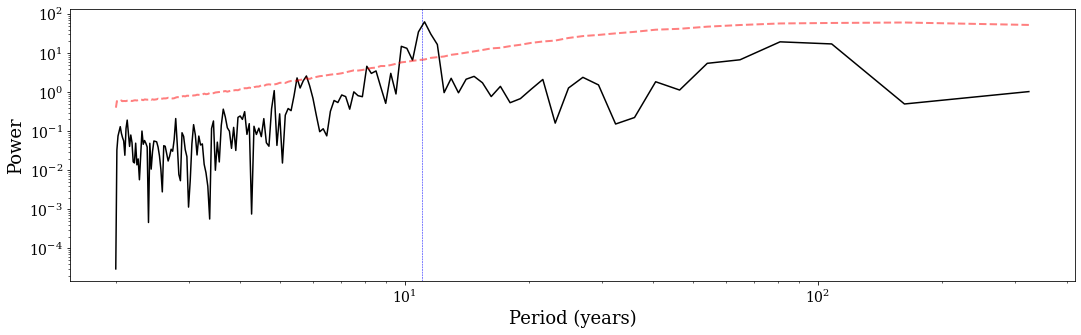

In [15]:
#-----------------------------------------
num_real = 5000
#-----------------------------------------

surrogate = ar1noise(osn, num_real)
surrogate_psd = []

for i in range(num_real):
    f, Pxx_den = signal.welch(x=surrogate[:,i],  window='hann', fs=Fs,  nperseg=len(osn), average='median')
    surrogate_psd.append(Pxx_den)
    

    
prctile = 95
signi_osn = np.percentile(np.array(surrogate_psd), prctile, axis=0)
    
    
    
f_osn, Pxx_den_osn = signal.welch(x=osn,  window='hann', fs=Fs,  nperseg=len(osn), average='median')


plt.figure(figsize=(18,5))
plt.axvline(x=11, color='b', ls='--', lw=0.5, label='11-yr cycle')
plt.loglog(1/f_osn, Pxx_den_osn, color ='k')
plt.loglog(1/f_osn, signi_osn, linewidth=2, alpha=0.5, color='r', linestyle='--')
plt.xlabel('Period (years)')
plt.ylabel('Power')

plt.show()

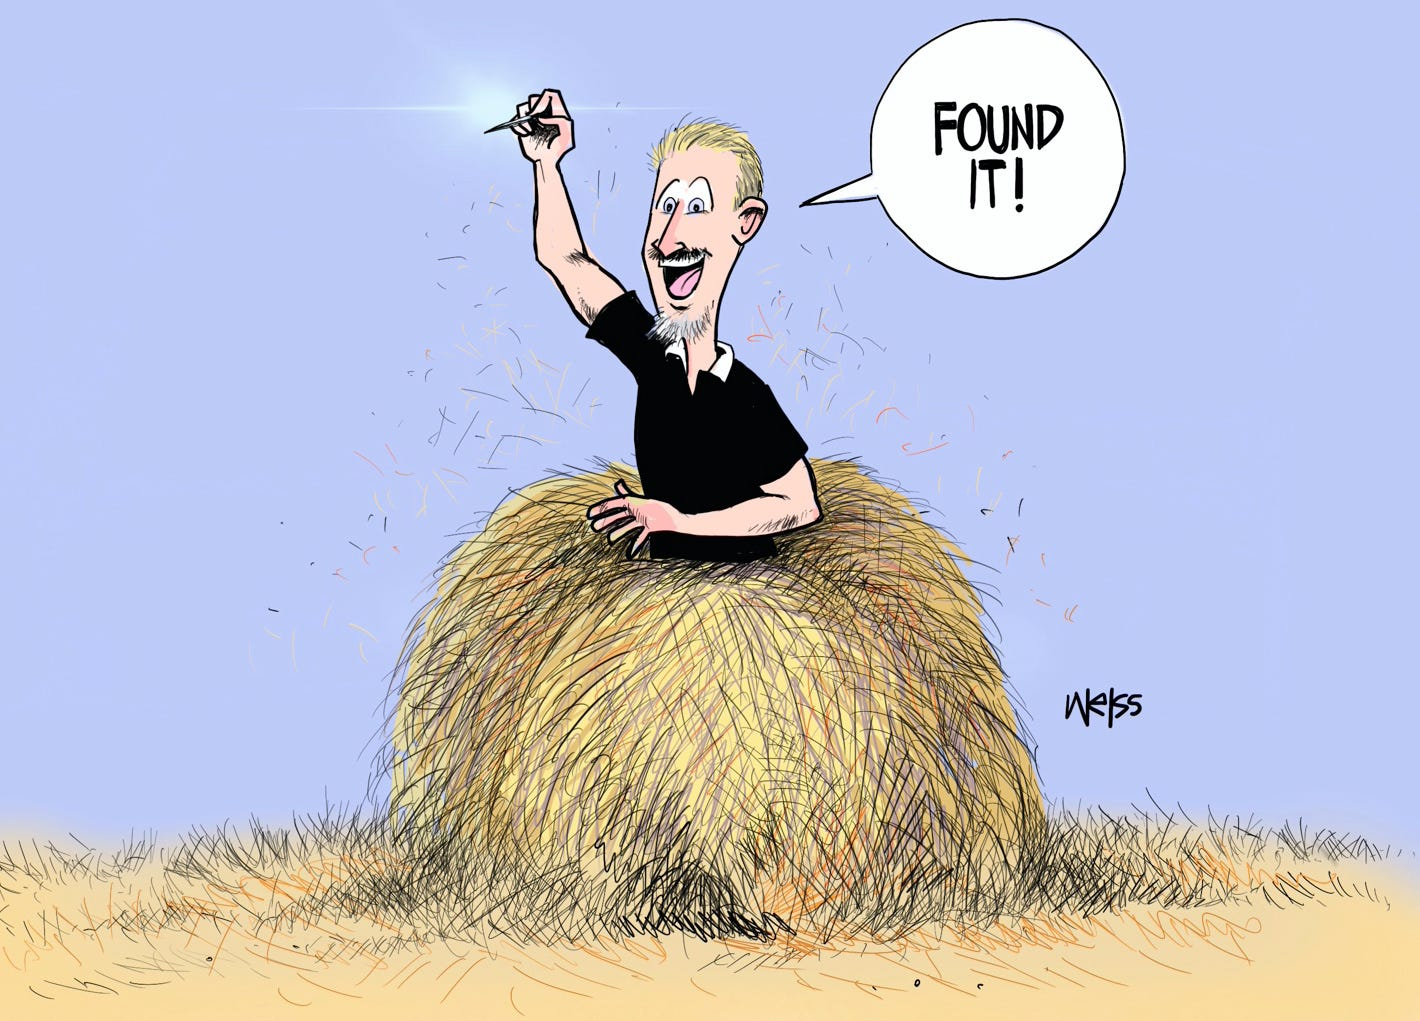

### Exercise 3: Synthesize an AR(2) model and repeat the above process to determine the statistical significance of peaks.

In [16]:
# your codes here





























## Acknowledgement

Chitradeep Saha, the creator of this notebook, would like to acknowledge various resources collected from [Chanseok Kang](https://goodboychan.github.io/python/datacamp/time_series_analysis/2020/06/08/01-Autoregressive-Models.html) and Prof. Ilya Usoskin. 